# Pymaceuticals Inc.

* From the bar chart we can clearly see that most number of mice were treated with 'Capomulin' and 'Remicane' drug regimen.
* Almost equal number of mice were treated between Male and Female.
* Out of four Drug Regimens evaluated, 'Capomulin' and 'Ramicane' seems to be more effective in reducing Tumor Volume compared to 'Infubinol' and 'Ceftamin'.
* We can see a reduction in Tumor Volume for mouse l509 treated with 'Capomulin'
* We can also observe a linear relationship between Weight of the mouse and Tumor Volume. Weight and Tumor Volume are closely related with a r value of 0.84.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [43]:
mouse_data_complete["Mouse ID"].unique().size

249

In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete[(mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids))]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_complete = mouse_data_complete[~mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids)]
clean_mouse_data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [47]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_complete["Mouse ID"].unique().size

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_mean_tumor_volume = clean_mouse_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_regimen_median_tumor_volume = clean_mouse_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_regimen_variance_tumor_volume = clean_mouse_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_regimen_std_dev__tumor_volume = clean_mouse_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_regimen_std_err_tumor_volume = clean_mouse_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume":drug_regimen_mean_tumor_volume
                                    ,"Median Tumor Volume":drug_regimen_median_tumor_volume
                                    ,"Tumor Volume Variance":drug_regimen_variance_tumor_volume
                                    ,"Tumor Volume Std. Dev.":drug_regimen_std_dev__tumor_volume
                                    ,"Tumor Volume Std. Err.":drug_regimen_std_err_tumor_volume})

drug_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Summary_agg = clean_mouse_data_complete.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
Summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

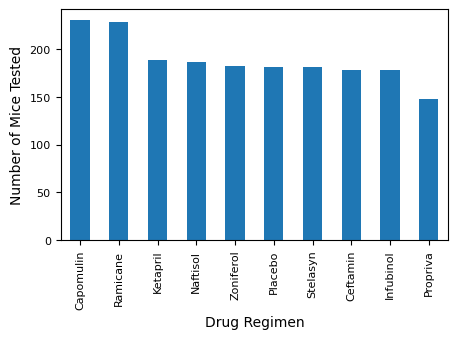

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_number_of_timepoints = clean_mouse_data_complete.groupby(['Drug Regimen']).count()['Timepoint'].to_frame()
drug_regimen_number_of_timepoints = drug_regimen_number_of_timepoints.sort_values(['Timepoint'], ascending=False).reset_index()
ax = drug_regimen_number_of_timepoints.plot.bar(x='Drug Regimen', y='Timepoint', rot=90, legend=False, figsize=(5,3))
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_ylabel('Number of Mice Tested')

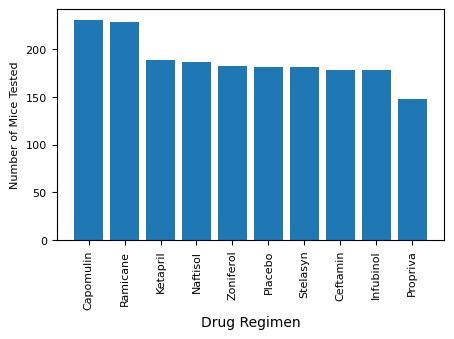

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(5, 3))

plt.bar(drug_regimen_number_of_timepoints['Drug Regimen'], drug_regimen_number_of_timepoints['Timepoint'])

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xticks(rotation=90)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.ylabel('Number of Mice Tested', fontsize=8)

plt.show()

Text(0, 0.5, 'Sex')

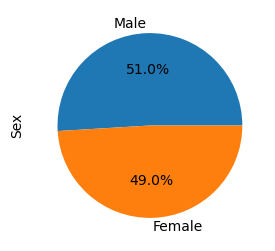

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male_distribution = clean_mouse_data_complete.groupby(['Sex']).count()['Mouse ID'].to_frame()
female_vs_male_distribution = female_vs_male_distribution.sort_values(['Mouse ID'], ascending=False)

#female_vs_male_distribution
ax = female_vs_male_distribution.plot.pie(y='Mouse ID', rot=90, legend=False, figsize=(3,3), autopct='%1.1f%%')
ax.set_ylabel('Sex')


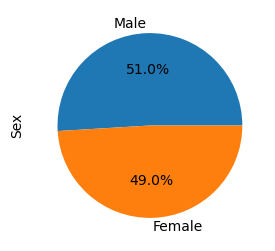

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(3, 3))

plt.pie(female_vs_male_distribution["Mouse ID"], labels = female_vs_male_distribution.index, autopct='%1.1f%%')

plt.ylabel('Sex')

plt.show() 

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_timepoint = clean_mouse_data_complete.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mouse_data_complete = pd.merge(clean_mouse_data_complete, mouse_greatest_timepoint, how="left", on=["Mouse ID", "Mouse ID"])
clean_mouse_data_complete = clean_mouse_data_complete.rename(columns={'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Greatest Timepoint'})
clean_mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tumor_volumes = clean_mouse_data_complete[(clean_mouse_data_complete['Drug Regimen'] == treatment) 
                              & (clean_mouse_data_complete['Timepoint'] == clean_mouse_data_complete['Greatest Timepoint'])]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(treatment_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    q1, q3 = treatment_tumor_volumes.quantile([0.25, 0.75])
    treatment_iqr = q3-q1
    
    lowerbound, upperbound = q1 - (1.5 * treatment_iqr), q3 + (1.5 * treatment_iqr)
    
    treatment_outliers = treatment_tumor_volumes.where(lambda x : (x < lowerbound) | (x >  upperbound)).dropna()
    print(f'{treatment}\'s potential outliers: {treatment_outliers}')
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


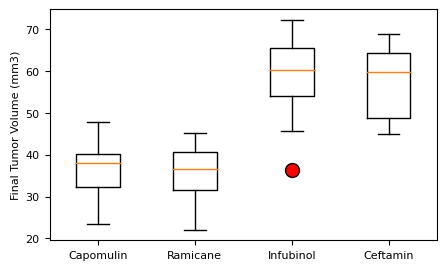

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(5, 3))

flierprops = dict(markerfacecolor='r', markersize=10, markeredgecolor='black')
plt.boxplot(tumor_volume, labels=treatments, flierprops=flierprops)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.ylabel("Final Tumor Volume (mm3)",  fontsize=8)

plt.show()


## Line and Scatter Plots

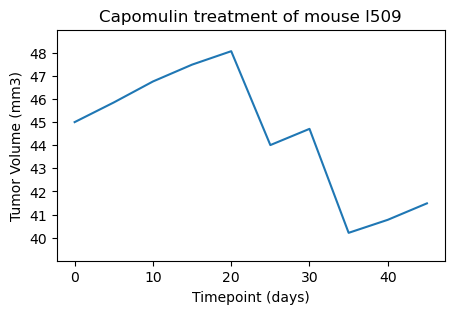

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_data_l509 = clean_mouse_data_complete[(clean_mouse_data_complete['Drug Regimen'] == 'Capomulin') 
                                                 & (clean_mouse_data_complete['Mouse ID'] == 'l509')]

plt.figure(figsize=(5, 3))

time_point = capomulin_mouse_data_l509['Timepoint']
tumor_volume = capomulin_mouse_data_l509['Tumor Volume (mm3)']

plt.plot(time_point, tumor_volume)
plt.yticks(np.arange(40, 49, 1))
plt.ylim(39,49)

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse l509')
plt.show()

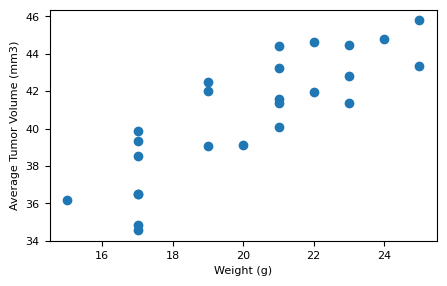

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_tumor_volume_by_weight = clean_mouse_data_complete[(clean_mouse_data_complete['Drug Regimen'] == 'Capomulin')] \
                    .groupby(['Mouse ID','Weight (g)']) \
                    .mean()['Tumor Volume (mm3)'].to_frame().reset_index()

plt.figure(figsize=(5, 3))
plt.scatter(x=capomulin_mouse_tumor_volume_by_weight['Weight (g)'], y=capomulin_mouse_tumor_volume_by_weight['Tumor Volume (mm3)'])

plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=8)

plt.tick_params(axis='both', which='major', labelsize=8)

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


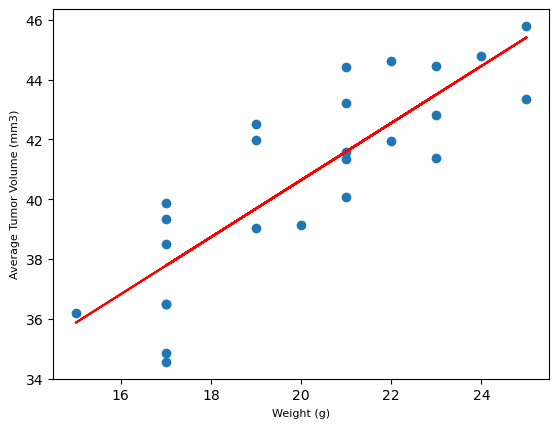

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_mouse_tumor_volume_by_weight['Weight (g)']
y = capomulin_mouse_tumor_volume_by_weight['Tumor Volume (mm3)']

lin_model = st.linregress(x, y)

print(f'The correlation between mouse weight and the average tumor volume is {round(lin_model.rvalue, 2)}')

plt.scatter(x, y)
plt.xlabel("Weight (g)", fontsize=8)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=8)

plt.plot(x, lin_model.slope * x + lin_model.intercept, color='red')

plt.show()